# Like RBPNet
https://doi.org/10.1186/s13059-023-03015-7

Changes:
- "n_filters": 128
- "n_layers": 9
- "batch_size": 128
- "in_window": 300
- "out_window": 300
- "max_jitter": 0

In [3]:
#!pip install bpnet-lite

In [4]:
!bpnet fit -p rbpnet_fit_example.json

/home/manglada/miniforge3/lib/python3.8/site-packages/tangermeme/ersatz.py:475: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(params, nopython=False, cache=True)
Loading Loci: 100%|███████████████████████| 4634/4634 [00:03<00:00, 1167.72it/s]
Training Set Size:  41459
Validation Set Size:  4634
Epoch	Iteration	Training Time	Validation Time	Training MNLL	Training Count MSE	Validation MNLL	Validation Profile Pearson	Validation Count Pearson	Validation Count MSE	Saved?
0	0	2.2143	0.7853	260.204	11.4266	230.9262	0.17824224	-0.053167664	0.8965	True
0	100	3.0641	0.2631	228.0174	0.7805	135.0523	0.21894582	-0.07828019	1.4772	True
0	200	2.5328	0.2703	215.8293	0.7846	134.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

log = pd.read_table("example.log")
log

,Epoch,Iteration,Training Time,Validation Time,Training MNLL,Training Count MSE,Validation MNLL,Validation Profile Pearson,Validation Count Pearson,Validation Count MSE,Saved?
0,0,0,2.214301,0.785301,260.204041,11.426612,230.926224,0.178242,-0.053168,0.896519,True
1,0,100,3.064103,0.263085,228.017365,0.780509,135.052338,0.218946,-0.078280,1.477243,True
2,0,200,2.532848,0.270255,215.829285,0.784589,134.919937,0.225030,-0.073103,1.479257,True
3,0,300,2.537242,0.263116,237.653824,0.890968,134.312256,0.226970,0.054330,1.696896,True
4,1,400,1.711006,0.207901,217.218658,0.851890,134.056213,0.227943,0.142188,1.523612,True
...,...,...,...,...,...,...,...,...,...,...,...
157,48,15700,2.405160,0.183827,201.055344,0.414550,132.044022,0.231249,0.592241,1.066374,False
158,48,15800,2.412706,0.186843,212.531281,0.367253,132.162323,0.230789,0.587385,1.098988,False
159,49,15900,0.553828,0.184515,208.812225,0.335414,132.004257,0.230643,0.590148,1.037003,False
160,49,16000,2.405953,0.182935,192.611969,0.335094,132.410110,0.230503,0.592189,1.082686,False


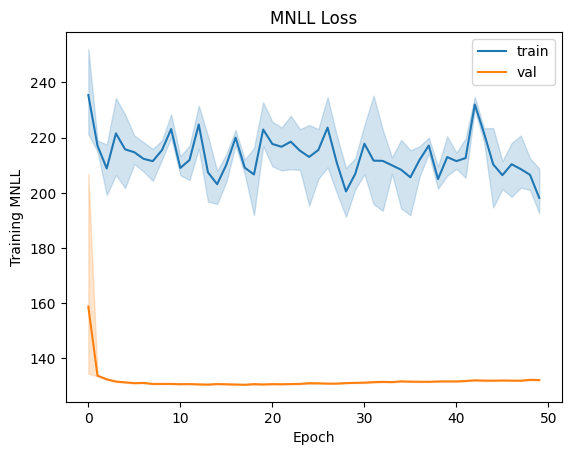

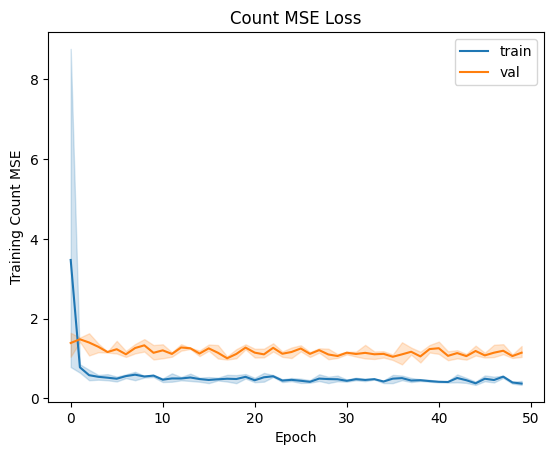

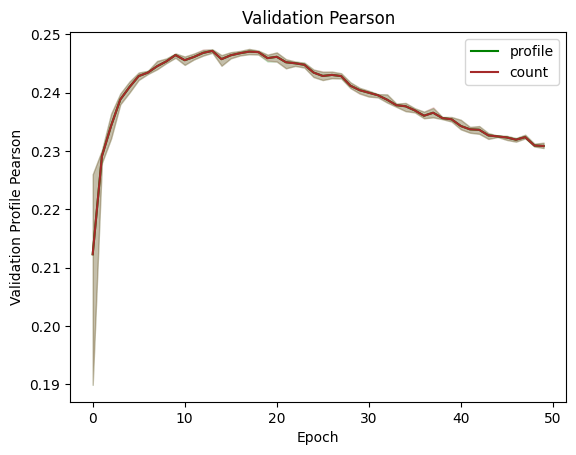

In [6]:
sns.lineplot(data=log, x="Epoch", y="Training MNLL", label="train")
sns.lineplot(data=log, x="Epoch", y="Validation MNLL", label="val")
plt.title("MNLL Loss")
plt.show()

sns.lineplot(data=log, x="Epoch", y="Training Count MSE", label="train")
sns.lineplot(data=log, x="Epoch", y="Validation Count MSE", label="val")
plt.title("Count MSE Loss")
plt.show()

sns.lineplot(data=log, x="Epoch", y="Validation Profile Pearson", color="green", label="profile")
sns.lineplot(data=log, x="Epoch", y="Validation Profile Pearson", color="brown", label="count")
plt.title("Validation Pearson")
plt.show()

In [73]:
!bpnet predict -p rbpnet_predict_example.json

/home/manglada/miniforge3/bin/bpnet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('bpnet-lite==0.8.1')
/home/manglada/miniforge3/lib/python3.8/site-packages/tangermeme/ersatz.py:475: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(params, nopython=False, cache=True)
100%|███████████████████████████████████████████| 73/73 [00:02<00:00, 33.93it/s]


In [74]:
import numpy as np
import torch

y_profile = np.load("y_profile.npz")
print(list(y_profile.keys()))
y_profile = y_profile["arr_0"]

y_counts = np.load("y_counts.npz")
print(list(y_counts.keys()))
y_counts = y_counts["arr_0"]

print(y_profile.shape, y_counts.shape) # batch, strands, seq_len

['arr_0']
['arr_0']
(4634, 2, 1200) (4634, 1)


In [75]:
# get ground truth
from tangermeme.io import extract_loci
import json

with open("rbpnet_fit_example.json", "r") as f:
    parameters_fit = json.load(f)
    
with open("rbpnet_predict_example.json", "r") as f:
    parameters_predict = json.load(f)

parameters_fit['controls'] = None

valid_data = extract_loci(
    sequences=parameters_fit['sequences'],
    signals=parameters_fit['signals'],
    in_signals=parameters_fit['controls'],
    loci=parameters_fit['loci'],
    chroms=parameters_fit['validation_chroms'],
    in_window=parameters_predict['in_window'],
    out_window=parameters_predict['out_window'],
    max_jitter=0,
    ignore=list('QWERYUIOPSDFHJKLZXVBNM'),
    verbose=parameters_fit['verbose']
)
print(valid_data[0].shape, valid_data[1].shape) # sequences and signals

Loading Loci: 100%|██████████████████████████████| 4634/4634 [00:03<00:00, 1222.77it/s]

torch.Size([4634, 4, 1300]) torch.Size([4634, 2, 1200])


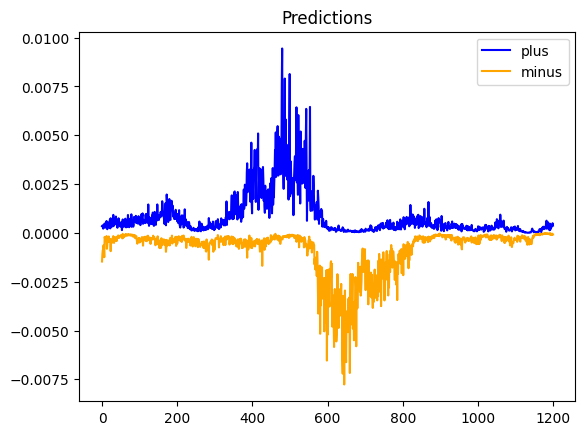

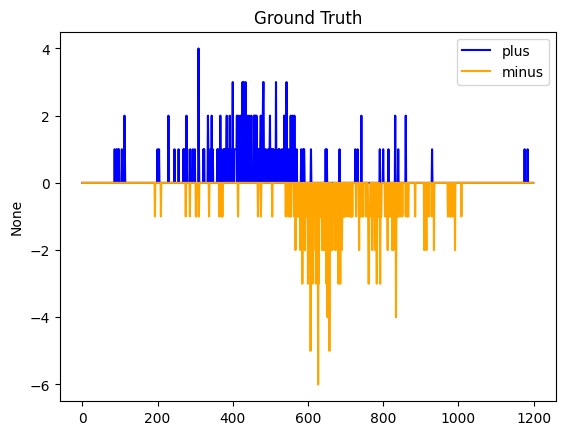

In [76]:
idx = 150

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# predictions
y = y_profile[idx, 0, :]
y = softmax(y)
x = np.arange(len(y))
sns.lineplot(x=x, y=y, label="plus", color="blue")

y = y_profile[idx, 1, :]
y = softmax(y)
x = np.arange(len(y))
sns.lineplot(x=x, y=-y, label="minus", color="orange")
plt.title("Predictions")
plt.show()

# ground truth
y = valid_data[1][idx, 0, :]
x = np.arange(len(y))
sns.lineplot(x=x, y=y, label="plus", color="blue")

y = valid_data[1][idx, 1, :]
x = np.arange(len(y))
sns.lineplot(x=x, y=-y, label="minus", color="orange")
plt.title("Ground Truth")
plt.show()

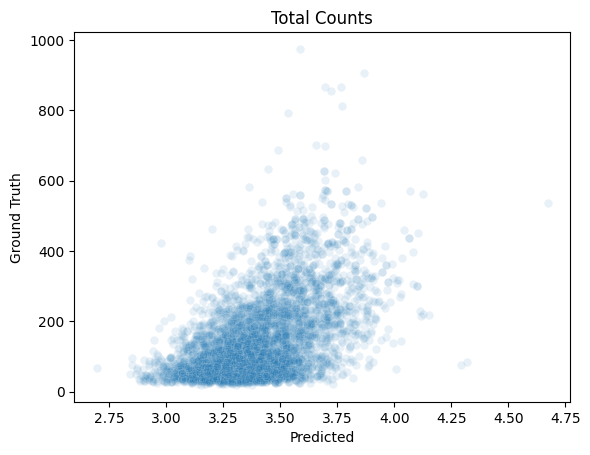

In [77]:
x = y_counts[:,0]
y = valid_data[1].sum(axis=1).sum(axis=1)
sns.scatterplot(x=x, y=y, alpha=0.1)
plt.ylabel("Ground Truth")
plt.xlabel("Predicted")
plt.title("Total Counts")
plt.show()